## 1 - Instalações e Imports

In [2]:
!pip install pandas
!pip install seaborn
%pip install plotly
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

## 2 - Leitura do dataset, verificação dos dados e renomeação das colunas

In [4]:
#Leitura dos dados
df_mobile = pd.read_csv('../Dados_Brutos/user_behavior_dataset.csv')

In [5]:
#Verificação do df
df_mobile.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
#Verificando os tipos de dados e valores nulos
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [7]:
#Nome das novas colunas
columns = ['user_id', 'device_model', 'operating_system','app_usage_time', 'screen_time', 'battery_drain', 'number_apps_installed', 'data_usage', 'age', 'gender', 'user_behavior_class']

In [8]:
#Função para renomear colunas
def renameColumns(df, renamed_columns):

    if len(df.columns) != len(renamed_columns):
        raise ValueError('The number of columns in the dataframe must be the same as the number of columns in the list')
    
    else:
        df.columns = renamed_columns
        return df

In [9]:
#Executando renomeação de colunas
df_mobile = renameColumns(df_mobile, columns)
display(df_mobile)

,user_id,device_model,operating_system,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,gender,user_behavior_class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [10]:
df_mobile.describe()

,user_id,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,user_behavior_class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


## 3- Verificando os dados únicos das colunas

In [11]:
mobile_models = df_mobile.device_model.unique()
mobile_models

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [12]:
op = df_mobile.operating_system.unique()
op

array(['Android', 'iOS'], dtype=object)

In [13]:
genders = df_mobile.gender.unique()
genders

array(['Male', 'Female'], dtype=object)

In [14]:
class_type = df_mobile.user_behavior_class.unique()
class_type

array([4, 3, 2, 5, 1])

## 4 - Análise geral dos dados

### Distribuição da idade geral, gerações x outras variáveis

#### Distribuição de idade geral

In [15]:
#Plotando dados do histograma
fig_age_distrib = px.histogram(df_mobile, x ='age')

#Alterando o tamanho dos bins
fig_age_distrib.update_traces(xbins= dict(size=1))

# Ajustando layout do gráfico
fig_age_distrib.update_layout(
    xaxis_title='Idade', 
    yaxis_title='Quantidade de usuários',
    title='Distribuição da idade dos usuários',
    bargap=0.1
)

# Mostrando o gráfico
fig_age_distrib.show()

***Conclusão***:
* A idade dos usuários é bem variada. Apresentando picos de quantidade de usuários em: 22, 25, 27, 29, 34, 42, 43, 51, e 55 anos.

#### Distribuição dos usuários por gerações

In [16]:
#Agrupando os dados da idade por gerações
df_mobile['age_generation'] = pd.cut(df_mobile['age'], bins=[12, 27, 43, 59, 76], labels=['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers'], right= False)
df_mobile

,user_id,device_model,operating_system,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,gender,user_behavior_class,age_generation
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Millennials
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,Gen X
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Millennials
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,Gen Z
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2,Gen Z
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4,Baby Boomers
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2,Gen X
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1,Gen X


In [17]:
df_mobile.groupby(['age_generation'], observed=True).size()

age_generation
Gen Z           145
Millennials     273
Gen X           269
Baby Boomers     13
dtype: int64

#### Distribuição das gerações pelas classes de comportamento de uso

In [18]:
#Agrupando os dados de classe de comportamento de uso por gerações
grouped_age_behavior = df_mobile.groupby(['age_generation', 'user_behavior_class'], observed=True).size().reset_index(name='count')
grouped_age_behavior

,age_generation,user_behavior_class,count
0,Gen Z,1,24
1,Gen Z,2,27
2,Gen Z,3,31
3,Gen Z,4,36
4,Gen Z,5,27
5,Millennials,1,63
6,Millennials,2,61
7,Millennials,3,53
8,Millennials,4,39
9,Millennials,5,57


In [19]:
#Criando o gráfico
fig_age_behavior = px.bar(
    grouped_age_behavior, 
    x='user_behavior_class', 
    y='count', 
    color='age_generation', 
    title='Distribuição das gerações por classificação de comportamento de uso', 
    barmode='group',
)

fig_age_behavior.update_layout(
    xaxis_title='Classe de comportamento', 
    yaxis_title='Quantidade de usuários'
)

#plotando
fig_age_behavior.show()

***Conclusão***:
* Neste dataset as gerações Z e Baby Boomers possuem menor quantidade de usuários em relação a Gen X e Millennials.
* Millennials se destacam nas classes 1, 2 e 5 de usuários. Possuem maior diversidade de perfis de uso
* Gen X possui um equilibrio na distribuição de classes, mas é mais proeminente  na classe  3 e 4. Pode indicar uma geração com um perfil mais consistente de uso.
* Genz Z possui quantidade de usuários equilibrada entre as classes. Destaca-se a classe 4, 3 e 5, com comportamento de uso do moderado a alto.
* Baby Boomers possuem menor quantidade de usuários. Destacam-se na classe 3 de comportamento de uso mais moderado.

#### Geração de usuários e quantidade de apps instalados

In [20]:
grouped_age_apps_installed = df_mobile.groupby('age_generation', observed=False).agg({'number_apps_installed':'mean'} )

# Renomeando a coluna
grouped_age_apps_installed['number_apps_installed'].rename('mean_number_apps_installed', inplace=True)

# Arredondando o valor
grouped_age_apps_installed['number_apps_installed'] = grouped_age_apps_installed['number_apps_installed'].round(0)

grouped_age_apps_installed

,number_apps_installed
age_generation,
Gen Z,53.0
Millennials,48.0
Gen X,52.0
Baby Boomers,55.0


***Conclusão:***
* Gen Z: Possui quantidade de apps acima da média geral, podendo ser um reflexo do ambiente tecnológico que foram criados. 
* Millennials: possuem quantidade de apps abaixo da média geral. essa análise aliada a de classificação de comportamento de uso pode indicar que são mais objetivos/seletivos quando se trata do uso dos apps.
* Gen X: Possuem quantidade de apps acima da média geral.
* Baby boomers: maior quantidade de apps instalados que todas as gerações, indicando uma tendência a explorar diferentes aplicativos, porém conforme a análise de comportamento o uso parace mais moderado.

#### Geração dos usuários e  gênero

In [21]:
#Agrupando os dados das gerações por gênero
grouped_age_gender = df_mobile.groupby(['age_generation', 'gender'], observed=True).size().reset_index(name='count')
grouped_age_gender

,age_generation,gender,count
0,Gen Z,Female,64
1,Gen Z,Male,81
2,Millennials,Female,143
3,Millennials,Male,130
4,Gen X,Female,123
5,Gen X,Male,146
6,Baby Boomers,Female,6
7,Baby Boomers,Male,7


In [22]:
fig_generation_gender = px.bar(
    grouped_age_gender, 
    x='gender', 
    y='count', 
    color='age_generation', 
    title='Distribuição do gênero por gerações', 
    barmode='group'
)

fig_generation_gender.update_layout(
    xaxis_title='Gênero', 
    yaxis_title='Quantidade de usuários'
)

fig_generation_gender.show()

In [23]:
generation_op = df_mobile.groupby(['age_generation', 'gender'], observed=True).agg({'operating_system':'value_counts'}).unstack().fillna(0)
generation_op

operating_system    
operating_system               Android iOS
age_generation gender                     
Gen Z          Female               50  14
               Male                 66  15
Millennials    Female              112  31
               Male                103  27
Gen X          Female               97  26
               Male                117  29
Baby Boomers   Female                3   3
               Male                  6   1

### Distribuição do gênero x outras variáveis


#### Distribuição do gênero por classe de uso


In [24]:
# Agrupando e contando dados
grouped_gender = df_mobile.groupby(['gender', 'user_behavior_class']).size().reset_index(name='count')

display(grouped_gender)

,gender,user_behavior_class,count
0,Female,1,63
1,Female,2,64
2,Female,3,82
3,Female,4,67
4,Female,5,60
5,Male,1,73
6,Male,2,82
7,Male,3,61
8,Male,4,72
9,Male,5,76


In [25]:
# Total de usuários por sexo
grouped_gender.groupby(['gender']).sum()

,user_behavior_class,count
gender,,
Female,15,336
Male,15,364


In [26]:
# criando gráfico
fig_gender_behavior = px.bar(
    grouped_gender, 
    x='user_behavior_class', 
    y='count', 
    color='gender', 
    title='Contagem de usuários por gênero separados por classificação de comportamento', 
    barmode='group',
)

fig_gender_behavior.update_layout(
    xaxis_title='Classe de comportamento', 
    yaxis_title='Quantidade de usuários'
)

#plotando
fig_gender_behavior.show()

***Conclusão:***
* O dataset possui um balanço entre os genêros, f = 336 e m = 364. Isso é importante, pois significa que as observações de diferença de comportamento entre gêneros não são resultado de um desbalanço da amostra
* Classes comportamentais 1,2,4 e 5 possuem maior usuários do sexo masculino. Sendo classe 2 e 5 mais desbalanceado com predominância masculina.
* Classe comportamental 3 possui maior usuários do sexo feminino, e na classe 4 é bem próximo da quantidade de usuários do sexo masculino

#### Distribuição do gênero e preferência por OS

In [27]:
gender_op = df_mobile.groupby(['gender', 'user_behavior_class', 'operating_system']).size().reset_index(name='total_users')
gender_op


,gender,user_behavior_class,operating_system,total_users
0,Female,1,Android,53
1,Female,1,iOS,10
2,Female,2,Android,49
3,Female,2,iOS,15
4,Female,3,Android,64
5,Female,3,iOS,18
6,Female,4,Android,51
7,Female,4,iOS,16
8,Female,5,Android,45
9,Female,5,iOS,15


In [28]:
# criando gráfico
fig_gender_behavior_os = px.bar(
    gender_op, 
    x='user_behavior_class', 
    y='total_users', 
    color='gender', 
    facet_col='operating_system',
    title='Contagem de Usuários por Sistema Operacional Separados por Classificação de Comportamento e Gênero ', 
    barmode='group',
)

fig_gender_behavior_os.update_layout(
    xaxis_title='Classe de comportamento', 
    yaxis_title='Quantidade de usuários'
)

#plotando
fig_gender_behavior_os.show()

#### Distribuição do gênero e numero de apps instalados

In [29]:
gender_usage_screen_class= df_mobile.groupby(['gender', 'user_behavior_class'], observed=True).agg({'number_apps_installed':['mean','std', 'median'],'screen_time':['mean','std', 'median'], 'app_usage_time':['mean','std', 'median'] })
gender_usage_screen_class.rename(columns ={'number_apps_installed':'use_metrics'}, inplace=True)
gender_usage_screen_class

use_metrics                  screen_time            \
                                  mean       std median        mean       std   
gender user_behavior_class                                                      
Female 1                     14.444444  3.057396   15.0    1.498413  0.276786   
       2                     29.593750  5.811097   30.0    3.062500  0.594285   
       3                     49.365854  5.572224   49.0    4.965854  0.575255   
       4                     70.134328  5.749560   69.0    6.880597  0.597530   
       5                     88.750000  5.655731   89.0   10.153333  1.147653   
Male   1                     14.657534  2.774983   15.0    1.483562  0.285780   
       2                     31.658537  5.373045   32.0    3.018293  0.603309   
       3                     50.852459  5.341149   51.0    4.942623  0.616565   
       4                     69.722222  5.127178   69.5    6.936111  0.560258   
       5                     89.644737  5.348405   90.0   10.084211  1.131141   

                                  app_usage_time                    
                           median           mean        std median  
gender user_behavior_class                                          
Female 1                     1.50      60.682540  17.062339   64.0  
       2                     3.15     133.453125  25.154715  133.0  
       3                     4.90     237.524390  35.034454  230.0  
       4                     6.80     397.388060  51.320430  408.0  
       5                    10.20     548.583333  30.788118  549.5  
Male   1                     1.50      60.205479  17.519797   64.0  
       2                     3.05     130.817073  25.805602  130.5  
       3                     5.00     232.540984  32.771722  227.0  
       4                     6.90     394.222222  53.392309  403.0  
       5                    10.40     535.763158  30.429752  534.5

***Conclusão:***
* Mulheres e homens: conforme o aumento do uso do celular, maior é o número de apps instalados. A mediana possui um comportamento semalhante à média, o que sugere que os valores estão bem distribuidos. Quanto ao desvio padrão observa-se que a classe 1 tem menor variabilidade de quantidade de apps instalados em relação as outras classes de uso. Essa proximidade dos valores indica que não há grandes diferenças entre gênero e os comportamentos de uso do celular. 

* Homens: analisando o desvio padrão de todas as classes observa-se que, no geral, homens possuem menor variabilidade de apps instalados, o que pode ser um indicativo de um comportamento mais uniforme quanto a quantidade de apps instalados.


## Correlação

In [30]:
## Retirar variáveis categóricas

## 5- Separação dos dados (device model, operating system, gender)

### 5.1 Device model

### Google Pixel 5 - Memória máx: 256GB - não expansível - bateria: 4700 mAh 

In [31]:
df_google_pixel = df_mobile[df_mobile['device_model'] == 'Google Pixel 5']
df_google_pixel.describe()

,user_id,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,user_behavior_class
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,348.281690,267.788732,5.076056,1475.676056,49.908451,897.704225,37.767606,2.915493
std,215.493837,180.031314,3.097286,809.354042,27.100785,643.885235,12.072867,1.421681
min,1.000000,34.000000,1.100000,302.000000,10.000000,105.000000,18.000000,1.000000
25%,150.750000,99.000000,2.025000,651.000000,26.750000,342.500000,27.000000,2.000000
50%,332.500000,231.500000,4.750000,1443.000000,48.000000,791.000000,36.000000,3.000000
75%,542.000000,443.500000,6.825000,2108.000000,69.750000,1275.000000,49.000000,4.000000
max,698.000000,595.000000,11.800000,2968.000000,99.000000,2481.000000,59.000000,5.000000


### OnePlus 9 - memória 128 GB (não expansível) - bateria: 4500 mAh

In [32]:
one_plus_9 = df_mobile[df_mobile['device_model'] == 'OnePlus 9']
one_plus_9.describe()

,user_id,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,user_behavior_class
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,353.037594,270.383459,5.241353,1523.849624,49.969925,911.120301,38.879699,2.977444
std,189.526020,183.494064,3.084569,835.151161,26.721895,621.401337,11.583712,1.405973
min,2.000000,30.000000,1.100000,309.000000,10.000000,103.000000,19.000000,1.000000
25%,221.000000,105.000000,2.500000,718.000000,28.000000,371.000000,29.000000,2.000000
50%,355.000000,216.000000,4.700000,1526.000000,46.000000,828.000000,40.000000,3.000000
75%,520.000000,433.000000,7.300000,2277.000000,74.000000,1359.000000,49.000000,4.000000
max,700.000000,598.000000,12.000000,2956.000000,99.000000,2477.000000,59.000000,5.000000


### Xiaomi mi 11 - memória: 256GB (não expansível) - bateria: 4600 mAh

In [33]:
xiaomi_mi_11 = df_mobile[df_mobile['device_model'] == 'Xiaomi Mi 11']
xiaomi_mi_11.describe()

,user_id,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,user_behavior_class
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,334.876712,268.452055,5.293151,1528.876712,49.924658,940.164384,37.767123,2.972603
std,214.049781,179.765905,3.148084,821.442490,27.201188,670.804828,11.653646,1.423668
min,3.000000,31.000000,1.100000,303.000000,10.000000,102.000000,18.000000,1.000000
25%,149.750000,102.000000,2.425000,764.000000,23.750000,351.000000,28.000000,2.000000
50%,285.000000,217.000000,4.900000,1565.500000,49.000000,820.500000,37.000000,3.000000
75%,514.750000,435.750000,7.400000,2228.500000,74.750000,1350.250000,48.750000,4.000000
max,697.000000,597.000000,11.900000,2993.000000,98.000000,2497.000000,59.000000,5.000000


### iPhone 12 - memória: 256 GB (não expansível) - bateria: 2815 mAh

In [34]:
iphone_12 = df_mobile[df_mobile['device_model'] == 'iPhone 12']
iphone_12.describe()

,user_id,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,user_behavior_class
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,352.609589,282.020548,5.430822,1589.513699,52.726027,965.506849,38.958904,3.102740
std,185.863738,169.592390,2.965330,817.175980,27.014816,624.746440,12.430151,1.368258
min,5.000000,32.000000,1.000000,308.000000,10.000000,111.000000,18.000000,1.000000
25%,196.000000,142.250000,2.900000,826.000000,28.250000,424.500000,29.000000,2.000000
50%,351.500000,257.500000,5.050000,1538.500000,52.000000,907.000000,39.000000,3.000000
75%,487.750000,431.750000,7.500000,2278.750000,76.750000,1381.250000,51.000000,4.000000
max,696.000000,597.000000,11.900000,2971.000000,99.000000,2416.000000,59.000000,5.000000


### Samsung Galaxy S21 - memória: 125GB (não expansível) - bateria: 4000 mAh

In [35]:
samsung_galaxy = df_mobile[df_mobile['device_model'] == 'Samsung Galaxy S21']
samsung_galaxy.describe()

,user_id,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,user_behavior_class
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.00000,133.000000,133.000000
mean,365.165414,266.421053,5.318045,1504.571429,50.804511,931.87218,39.112782,2.977444
std,205.512854,175.264571,3.079424,820.700923,26.920888,645.79416,12.388689,1.400574
min,7.000000,30.000000,1.000000,310.000000,10.000000,109.00000,18.000000,1.000000
25%,190.000000,111.000000,2.800000,681.000000,25.000000,392.00000,28.000000,2.000000
50%,385.000000,217.000000,5.000000,1507.000000,51.000000,861.00000,39.000000,3.000000
75%,544.000000,414.000000,7.300000,2169.000000,75.000000,1372.00000,51.000000,4.000000
max,699.000000,593.000000,11.800000,2920.000000,99.000000,2481.00000,59.000000,5.000000


## ML -KNN

Primeiro é necessário transformar variáveis categóricas atraves de one-hot-encoding para fzer a amtriz de correlação

In [36]:
df_mobile_knn = df_mobile.drop(columns=['user_id', 'age_generation'])
df_mobile_knn

,device_model,operating_system,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,gender,user_behavior_class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [37]:
for column in df_mobile_knn.columns:
    if df_mobile_knn[column].dtype == 'object':
        df_mobile_knn = pd.get_dummies(df_mobile_knn, dtype='int64', columns=[column], drop_first=True)
df_mobile_knn

,app_usage_time,screen_time,battery_drain,number_apps_installed,data_usage,age,user_behavior_class,device_model_OnePlus 9,device_model_Samsung Galaxy S21,device_model_Xiaomi Mi 11,device_model_iPhone 12,operating_system_iOS,gender_Male
0,393,6.4,1872,67,1122,40,4,0,0,0,0,0,1
1,268,4.7,1331,42,944,47,3,1,0,0,0,0,0
2,154,4.0,761,32,322,42,2,0,0,1,0,0,1
3,239,4.8,1676,56,871,20,3,0,0,0,0,0,1
4,187,4.3,1367,58,988,31,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,2,0,0,0,1,1,1
696,316,6.8,1965,68,1201,59,4,0,0,1,0,0,1
697,99,3.1,942,22,457,50,2,0,0,0,0,0,0
698,62,1.7,431,13,224,44,1,0,1,0,0,0,1


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [39]:
corr_matrix = df_mobile_knn.corr()

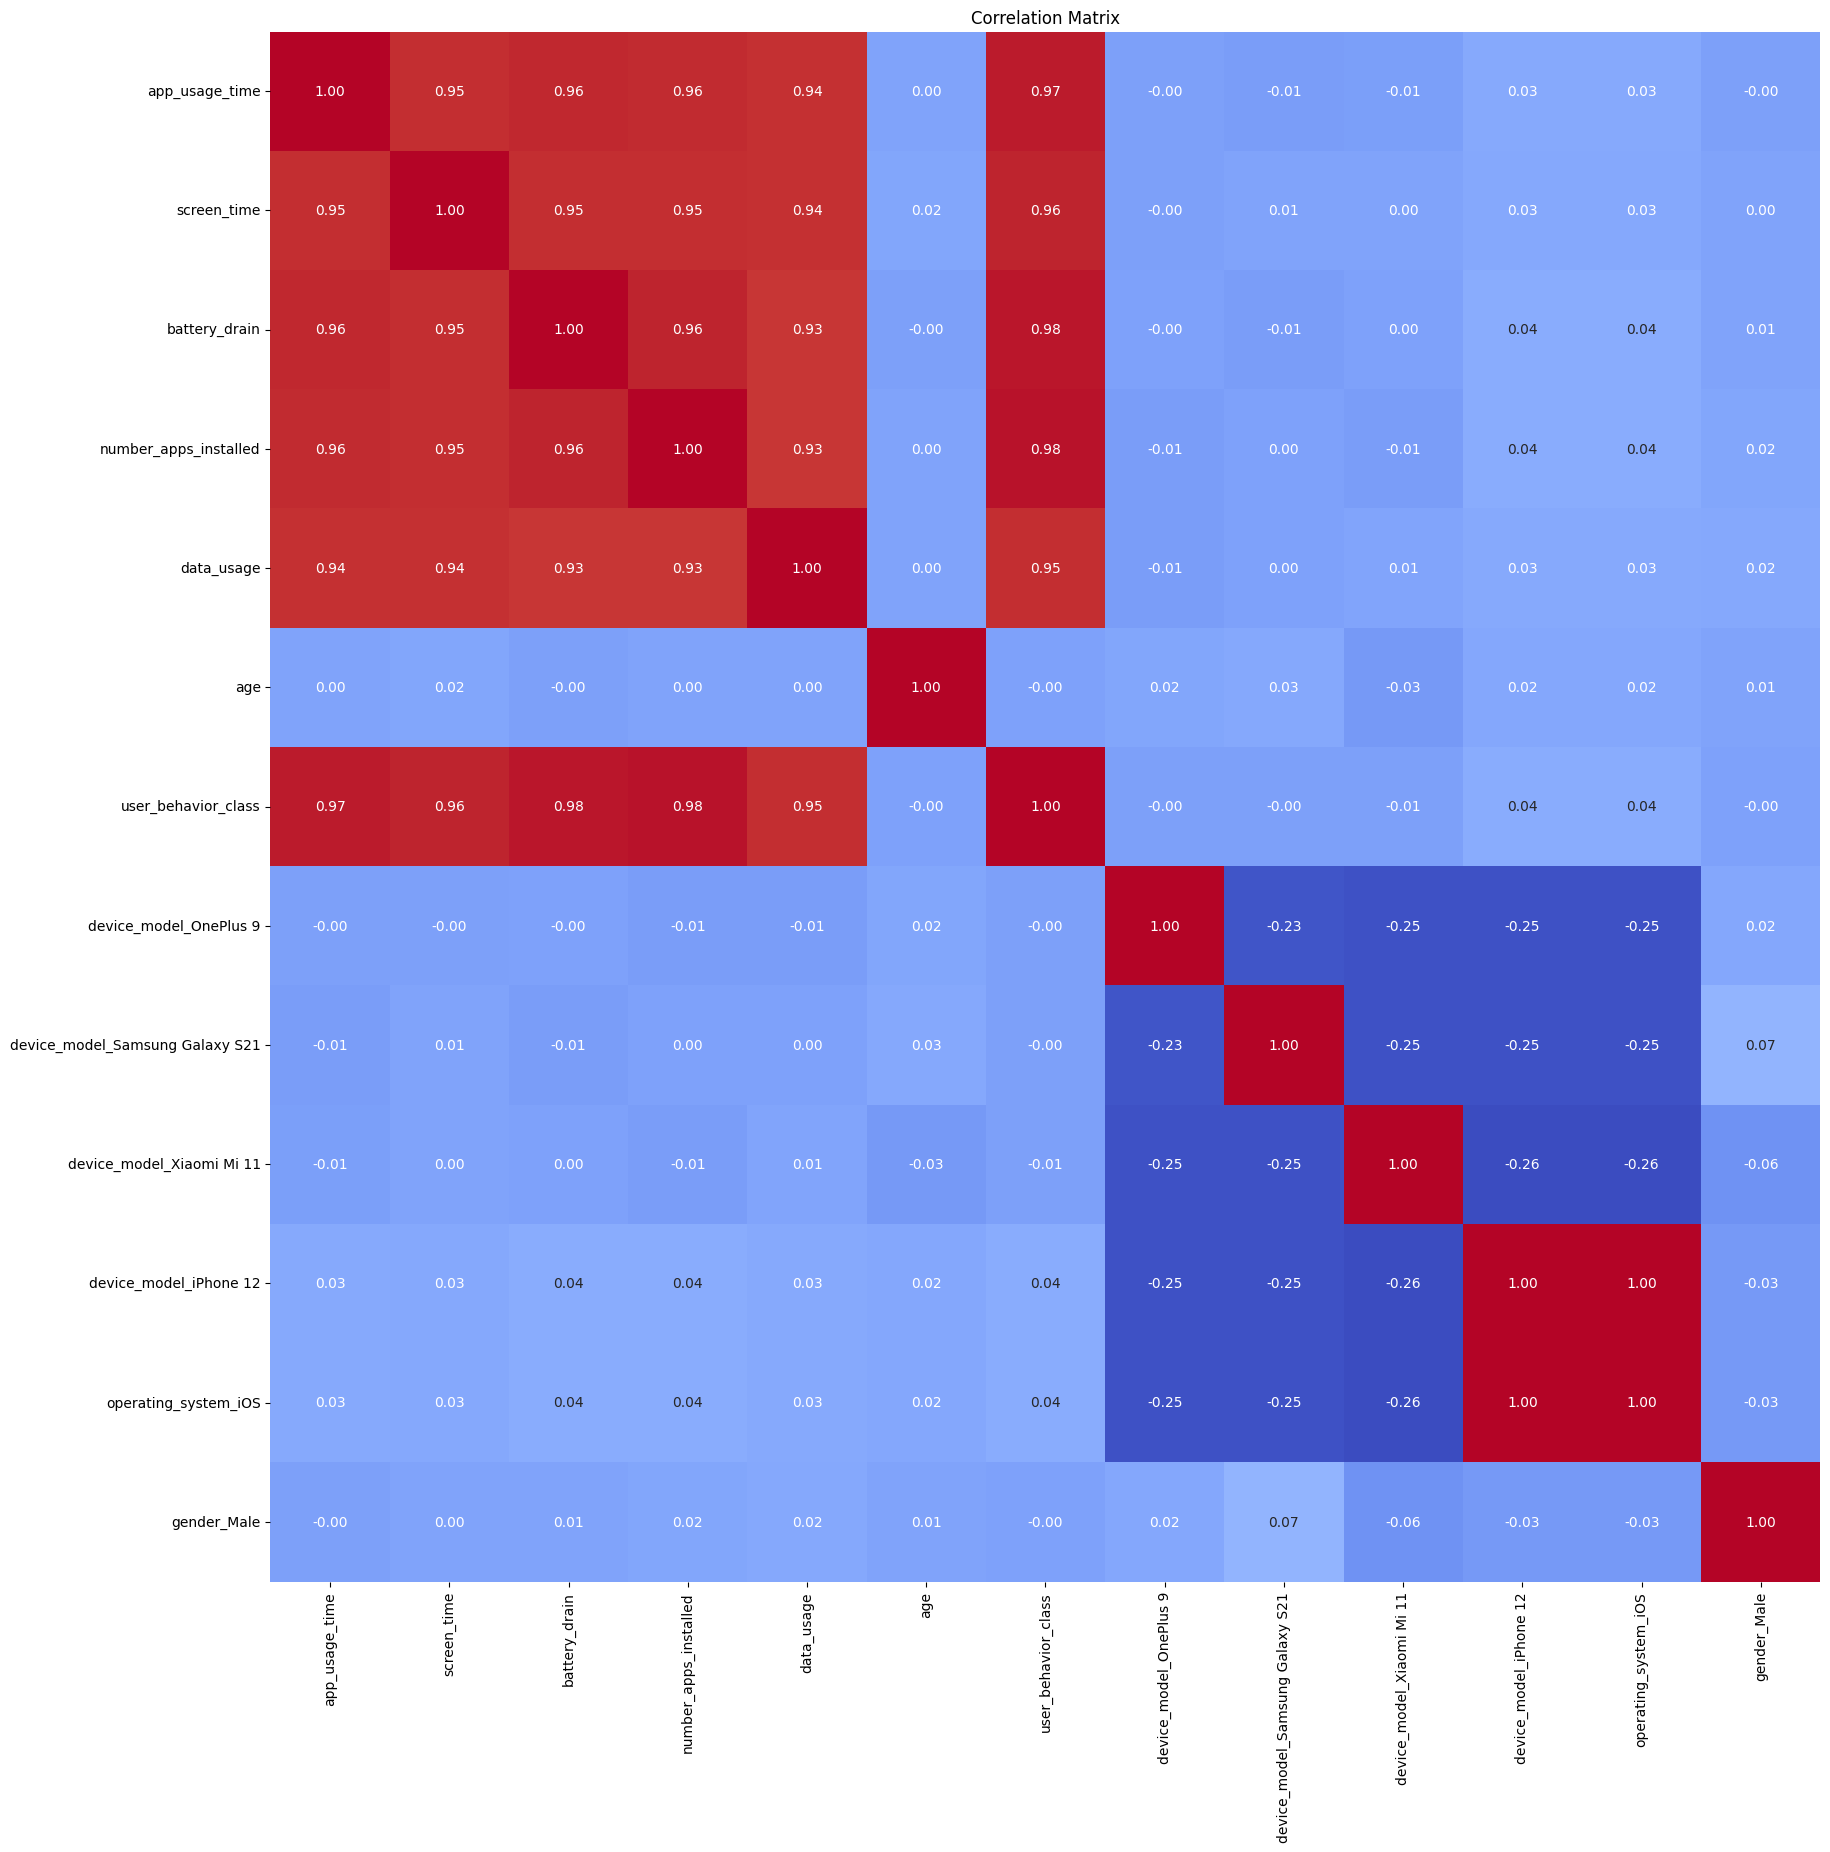

In [40]:
plt.figure(figsize=(20, 30))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=False)
plt.title('Correlation Matrix')
plt.show()

A matrix de correlação gerada demonstra que user_behavior_class está relacionada as seguintes features: app_usage_time, scrrentime, battery_drain, number_apps_installed, data_usage. E essas fetures possuem correlação forte entre si.

In [52]:
X = df_mobile_knn.drop(columns=['user_behavior_class'])
y = df_mobile_knn['user_behavior_class']
k = 7

In [53]:
selector = SelectKBest(score_func=f_classif, k=k)

In [54]:
X_new = selector.fit_transform(X, y)

In [55]:
selected_features = X.columns[selector.get_support(indices=True)]
print("Variáveis selecionadas:", selected_features)

Variáveis selecionadas: Index(['app_usage_time', 'screen_time', 'battery_drain',
       'number_apps_installed', 'data_usage',
       'device_model_Samsung Galaxy S21', 'gender_Male'],
      dtype='object')
